# **U-net**

<font size = 4>U-net is an encoder-decoder architecture originally used for image segmentation. The first half of the U-net architecture is a downsampling convolutional neural network which acts as a feature extractor from input images. The other half upsamples these results and restores an image by combining results from downsampling with the upsampled images.

<font size = 4>U-net has become a commonly used architecture for image-to-image tasks and is also used in [CARE](https://www.nature.com/articles/s41592-018-0216-7).

<font size = 4>This notebook represents a basic U-net architecture which can be used by users to get acquainted with the functionality of image-to-image networks in microscopy. It should not be expected to provide results as good as networks built for specific image-to-image tasks.

---
<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the Zero-Cost Deep-Learning to Enhance Microscopy project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook is largely based on the papers: 

<font size = 4>**U-Net: Convolutional Networks for Biomedical Image Segmentation** by *Olaf Ronneberger, Philipp Fischer, Thomas Brox*  (https://arxiv.org/abs/1505.04597)

<font size = 4>and 

<font size = 4>**U-Net: deep learning for cell counting, detection, and morphometry** by *Thorsten Falk et al.* Nature Methods 2019
(https://www.nature.com/articles/s41592-018-0261-2)
And source code found in: https://github.com/zhixuhao/unet by *zhixuhao*

<font size = 4>**Please also cite this original paper when using or developing this notebook.** 

# **How to use this notebook?**

---
###**Structure of a notebook**

<font size = 4>A notebook is conveniently made of text annotation that describe the code and workflow (**Text cells**) as well as sections that contain the code that is executed (**Code cells**).  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom the table of contents, code snippets and files.

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

# **0. Before getting started**
---

<font size = 4>

1. Create folders in the following format and upload them into your google drive:**
*   **drive**
    - source
      - img_1.tif, img_2.tif, ...
    - target
      - img_1.tif, img_2.tif, ...
    - prediction
    - prediction-groundtruth (optional)

2. Place the input images (e.g. the images you want the model to learn to segment) in the **source** folder and your desired output (e.g. segmentation maps) into the **target** folder. Corresponding **source and target images** must have the **same name**.
3. Place all your test images in the **prediction** folder.
4. If you want to compare the predicted images to the ground-truth output you can also add an additional folder containing prediction ground-truths. 

# **1. Set the Runtime type and mount your Google Drive**
---

## **1.1 Change the Runtime**
---

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelator: GPU** *(Graphics processing unit (GPU)*


In [0]:
#@title ##Run this cell to check if you have GPU access
%tensorflow_version 1.x

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')

from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

You have GPU access


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6361160101369581146, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 181311853646146686
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4802520828995557564
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15956161332
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15769914242450901800
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

## **1.2. Mount Google Drive**
---
<font size = 4> To use this notebook on your own data, you need to mount your Google Drive to this notebook.

<font size = 4> Play the below cell to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter.

In [0]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **2. Install U-net Dependencies**
---


In [0]:
#@markdown ##Play to install U-net dependencies

#As this notebokk depends mostly on keras which runs a tensorflow backend (which in turn is pre-installed in colab)
#only the data library needs to be additionally installed.
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)
print("Tensorflow enabled.")

#We enforce the keras==2.2.5 release to ensure that the notebook continues working even if keras is updated.

!pip install keras==2.2.5
!pip install data

from keras import models
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as keras
from data import *
from __future__ import print_function
import numpy as np 
import os
import glob
import skimage.io as io
import skimage.transform as trans
from skimage import img_as_ubyte
from matplotlib.pyplot import imread
from pathlib import Path

1.15.0
Tensorflow enabled.
  Created wheel for data: filename=data-0.4-cp36-none-any.whl size=7247 sha256=192a1f2e028ef8faec8e342aad28ea8614cd3f153cedebc923a0e45c7ae04c32
  Stored in directory: /root/.cache/pip/wheels/f6/09/e5/5afbc45fb0de471541092c7cd8b48d3483be68b1890955e6b9
Successfully built data


Using TensorFlow backend.


# **3. Select your parameters and paths**

---

##**3.1. Parameters and paths**
---

<font size = 5> **Paths for training data and models**

<font size = 4>**`Training_source`, `Training_target`:** Enter the path to the source and target images for training. These should be located in the same parent folder.

<font size = 4>**`model_name`:** Use only my_model -style, not my-model. If you want to use a previously trained model, enter the name of the pretrained model (which should be contained in the trained_model -folder after training).

<font size = 4>**`model_path`**: Enter the path of the folder where you want to save your model.

**Make sure the directories exist before entering them!**

<font size = 5> **Select training parameters**

<font size = 4>**`steps`**: This number should be equivalent to the number of samples in the training set divided by the batch size, to ensure the training iterates through the entire training set. Smaller values can be tested for testing. **Default: 30**

<font size = 4>**`epochs`**: Choose more epochs for larger training sets. Observing how much the loss reduces between epochs during training may help determine the optimal value. **Default: 20**

<font size = 5>**Advanced Parameters - experienced users only**

<font size = 4>**`batch_size`**: This parameter describes the amount of images that are loaded into the network per step. Smaller batchsizes may improve training performance slightly but may increase training time. If the notebook crashes while loading the dataset this can be due to a too large batch size. Decrease the number in this case. **Default: 5**

<font size = 4> **`pooling_steps`**: Choosing a different number of pooling layers can affect the performance of the network. Each additional pooling step will also two additional convolutions. The network can learn more complex information but is also more likely to overfit. Achieving best performance may require testing different values here. **Default: 3**

<font size = 4>**`loss_function`**: Training performance depends strongly on the loss function. To find out more about losses, see: https://keras.io/losses/. **Default: binary_crossentropy**




In [0]:
#@markdown ###Path to training images:

#base_directory = '/content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/Notebooks to be tested/Training datasets/U-net' #@param {type:"string"}

Training_source = '/content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/Notebooks to be tested/Training datasets/U-net/Training - Images' #@param {type:"string"}

#We find the name of the base_directory (before reassigning the Training_source name to just a name)
path = Path('content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/Notebooks to be tested/Training datasets/U-net/Training - Masks')
base_directory = '/'+(str(path.parent))

#We reassign Training_source to just include the name of the folder, instead of the whole path.
Training_source = os.path.basename(os.path.normpath(Training_source))


Training_target = '/content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/Notebooks to be tested/Training datasets/U-net/Training - Masks' #@param {type:"string"}
#We reassign Training_target to just include the name of the folder, instead of the whole path.
Training_target = os.path.basename(os.path.normpath(Training_target))

#@markdown ###Name of the model and path to model folder:

#prediction = 'Test - Images' #@param {type:"string"}
model_name = 'my_Unet_model' #@param {type:"string"}
model_path = '/content/gdrive/My Drive/' #@param {type:"string"}

#@markdown If you want to save a model after each epoch untick this box. If ticked (recommended) you will save only the model that had the best performance during training.
save_best_only = True #@param {type:"boolean"}
if save_best_only == True:
  model_checkpoint = ModelCheckpoint(model_path+model_name+'.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
else:
  model_checkpoint = ModelCheckpoint(model_path+model_name+'.{epoch:02d}-{loss:.2f}.hdf5', monitor='val_loss', verbose=1, save_best_only=False)


#@markdown ###Training parameters

#Image size
images = os.listdir(base_directory+'/'+Training_source)
I = imread(base_directory+'/'+Training_source+'/'+images[0])
image_size = I.shape[0]

input_colour_mode = 'grayscale'
target_colour_mode = 'grayscale'

#@markdown Number of steps, epochs and batches
steps =  40#@param {type:"number"}
epochs =  30#@param {type:"number"}
#batch_size =  3#@param {type:"integer"}

prediction_format = '.tif'

#@markdown ###Advanced Parameters
Use_Default_Advanced_Parameters = False #@param {type:"boolean"}

#@markdown ###If not, please input:
batch_size =  2#@param {type:"integer"}
pooling_steps = 3 #@param [1,2,3,4]{type:"raw"}
loss_function = 'binary_crossentropy' #@param ["binary_crossentropy", "mean_squared_error", "mean_absolute_error"] {type:"string"}

if (Use_Default_Advanced_Parameters): 
  print("Default advanced parameters enabled")
  batch_size = 4
  pooling_steps = 3
  loss_function = 'binary_crossentropy'

#Here we normalize the input images and adjust the values of the mask to clearly demarcate signal from background.
def adjustData(img,mask,flag_multi_class,num_class):
    img = img / 255
    mask = mask /255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return (img,mask)

def trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (image_size,image_size),seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    #default save_to_dir = None
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        subset = 'training',
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        subset = 'training',
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)

def validationGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale", 
                        mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                        flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (image_size,image_size),seed = 1):

    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        subset = 'validation',
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        subset = 'validation',
        seed = seed)
    validation_generator = zip(image_generator, mask_generator)
    for (img,mask) in validation_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)

def testGenerator(test_path,target_size = (image_size,image_size),flag_multi_class = False,as_gray = True):
    for filename in os.listdir(test_path):
        img = io.imread(os.path.join(test_path,filename),as_gray = as_gray)
        img = img/255
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img

def saveResult(save_path,npyfile,flag_multi_class = False,num_class = 2):
    for i,item in enumerate(npyfile):
        io.imsave(os.path.join(save_path,"predicted_"+str(i)+prediction_format),img_as_ubyte(item))


#This is code outlines the architecture of U-net. The choice of pooling steps decides the depth of the network. 
def unet(pretrained_weights = None,input_size = (image_size,image_size,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
#Downsampling steps
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    
    if pooling_steps > 1:
      pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
      conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
      conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)

      if pooling_steps > 2:
        pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
        conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
        conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
        drop4 = Dropout(0.5)(conv4)
      
        if pooling_steps > 3:
          pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
          conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
          conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
          drop5 = Dropout(0.5)(conv5)

#Upsampling steps

          up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
          merge6 = concatenate([drop4,up6], axis = 3)
          conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
          conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
          
    if pooling_steps > 2:
      up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop4))
      if pooling_steps > 3:
        up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
      merge7 = concatenate([conv3,up7], axis = 3)
      conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
      
    if pooling_steps > 1:
      up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv3))
      if pooling_steps > 2:
        up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
      merge8 = concatenate([conv2,up8], axis = 3)
      conv8 = Conv2D(128, 3, activation= 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    
    if pooling_steps == 1:
      up9 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv2))
    else:
      up9 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8)) #activation = 'relu'
    
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9) #activation = 'relu'

#You can add to or reduce the number of convolution layers, 
#but make sure the output dimensions of one layer match the input dimensions of the next.
    
    #conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9) #activation = 'relu'
    #conv9 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9) #activation = 'relu'
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = loss_function, metrics = ['acc'])
    
    print(model.summary())

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

##**3.2. Data Augmentation**

---

<font size = 4> Data augmentation can improve training progress by amplifying differences in the dataset. This can be useful if the available dataset is small as without augmentation a network could quickly learn every example in the dataset. Augmentation is not necessary for training and if the dataset is large the values can be set to 0.

In [0]:
#@markdown ##Augmentation Options
#@markdown **Shift images on the horizontal axis** (0.1 is equivalent to 10%):
width_shift_range =  0.1#@param {type:"number"}
#@markdown **Shift images on the vertical axis** (0.1 is equivalent to 10%):
height_shift_range =  0.1#@param {type:"number"}

#@markdown **Rotate image within angle range (degrees):**
rotation_range =  90#@param {type:"number"}
#@markdown **Enlargen fields of view of images:**
zoom_range =  0.1#@param {type:"number"}
#@markdown **Choose shearing range:**
shear_range =  0.1#@param {type:"number"}
#@markdown **Horizontal Flip:**
horizontal_flip = True #@param {type:"boolean"}
#@markdown **Vertical Flip:**
vertical_flip = True #@param {type:"boolean"}

#given behind the # are the default values for each parameter.

data_gen_args = dict(width_shift_range=width_shift_range,#0.1
                     height_shift_range=height_shift_range,#0.1
                     rotation_range=rotation_range, #90
                     zoom_range=zoom_range,
                     shear_range=shear_range,
                     horizontal_flip=horizontal_flip,
                     vertical_flip=vertical_flip,
                     validation_split = 0.05,
                     fill_mode='nearest') #0.2)

# **4. Train the network**
---
####**Troubleshooting:** If you receive a time-out or exhausted error, try reducing the batchsize of your training set. This reduces the amount of data loaded into the model at one point in time. 

## **4.1. Train the network**
---

In [0]:
#@markdown ##Start Training

#Overwrite the model if it already exists
if os.path.exists(model_path+'/'+model_name):
  shutil.rmtree(model_path+'/'+model_name)

Generator = trainGenerator(batch_size, base_directory, Training_source, Training_target, data_gen_args, save_to_dir = None)

val_Generator = validationGenerator(batch_size, base_directory, Training_source, Training_target, data_gen_args, save_to_dir = None)
model = unet()
history = model.fit_generator(Generator,steps_per_epoch=steps,epochs=epochs, callbacks=[model_checkpoint], validation_data=val_Generator, validation_steps=3, shuffle=True, verbose=1)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 512, 512, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 512, 512, 64) 36928       conv2d_17[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 256, 256, 64) 0           conv2d_18[0][0]                  
____________________________________________________________________________________________

## **4.2. Evaluate the training**
---

<font size = 4>It is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Loss** <code>(loss)</code> describes an error value after each epoch for the difference between the model's prediction and its 'GT' target.

<font size = 4>**Validation error** <code>(val_loss)</code> describes the same error value between the model's prediction on a validation image (taken from 'low') and compared to it's target (from 'GT').

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease even after further training. Comparing the development of the validation error with the training error can give insights into the model's performance.

<font size = 4>If **validation error is clearly higher than training error**, it means that the training data might be too complex or diverse. In this case, the trained network fails to improve unseen images. To avoid this, increase the number of epochs and check if you can improve your dataset with more examples.

<font size = 4>If **validation error is clearly smaller than training error**, it means that training data is too simple which allows the network to learn the training data perfectly but to perform poorly on unseen data. This is called overfitting which should be always be avoided as it can lead to artefacts in the predctions of the network. First steps to avoid this can be to reduce the number of training epochs or to use a larger training dataset.

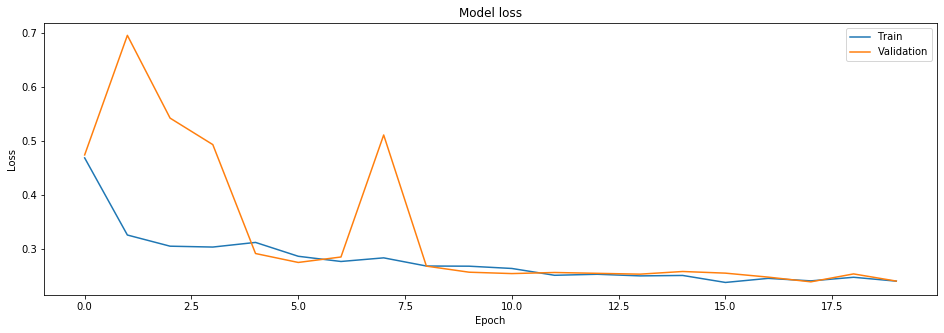

In [0]:
#@markdown ##Play the cell show figure of training errors
from matplotlib import pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **5. Use the network**

---
<font size = 4> In this section a trained model can be used for prediction. If you want to continue with model you trained above enter the same values. If you want to use a different previously trained model change the paths of **Test_data_folder**, **Results_folder** and the **inference_model_name** as needed.

<font size = 4>**Select paths and model for prediction**

<font size = 4>**`prediction`:** Enter the path of the folder containing the images you want to use your trained model on. These images should be 'unseen', i.e. not part of the training dataset.

<font size = 4>**`Results_folder`:**  Choose your preferred location for saving the predicted files. By default this will be the content folder which allows viewing the files instead of saving to drive. Change this to save to your drive folder.

<font size = 4>**`inference_model_name`:** Choose the name of the saved model that you want to use for the inference on the data.

<font size = 4> **Troubleshooting:** If there is a low contrast image warning when saving the images, this may be due to overfitting of the model to the data. It may result in images containing only a single colour. Train the network again with different network hyperparameters.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 512, 512, 64) 36928       conv2d_1[0][0]                   
________________________________________________________________________

Text(0.5, 1.0, 'Prediction')

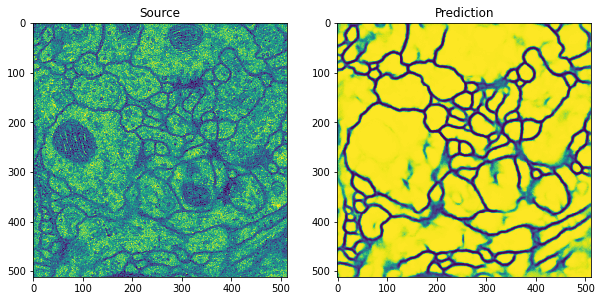

In [0]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os

Test_data_folder = '/content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/Notebooks to be tested/Training datasets/U-net/Test - Images' #@param {type:"string"}

Results_folder = '/content/' #@param {type:"string"}

#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the name of the model and path to model folder:
#@markdown ####During the training, the model files are automatically saved inside of a folder named by the parameter 'model_name' (see section 3). Please provide the name of this folder as 'inference_model_name' and the path to its parent folder in 'inference_model_path'. 

inference_model_name = 'my_model_Unet' #@param {type:"string"}

inference_model_path = "/content/gdrive/My Drive" #@param {type:"string"}

testGen = testGenerator(Test_data_folder)

#load the trained model
os.chdir(Results_folder)
model = unet()

if Use_the_current_trained_model == True:
  os.chdir(model_path)
  model.load_weights(model_name+".hdf5")
else:
  os.chdir(inference_model_path)
  model.load_weights(inference_model_name+".hdf5")

#Create a list of validation sources
source_dir_list = os.listdir(Test_data_folder)
num = len(source_dir_list)

#Here, we create the predictions from the inputs and save them to the results folder

predictions = model.predict_generator(testGen, num, verbose=1)
saveResult(Results_folder,predictions)


#Fetch a random validation source and corresponding model prediction

os.chdir(Test_data_folder)
random_choice = random.randint(0,num-1)
random_sample = os.path.join(Test_data_folder,source_dir_list[random_choice])

#This is the prediction source image
I = plt.imread(random_sample)

#This is the predicted image from the trained model
J = plt.imread(os.path.join(Results_folder,'predicted_'+str(random_choice)+prediction_format))


f=plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(I, interpolation='nearest')
plt.title('Source')

plt.subplot(1,2,2)
plt.imshow(J, interpolation='nearest')
plt.title('Prediction')